In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120

In [4]:
tickers = ["AAPL","MSFT","TSLA"]

df = yf.download(tickers, period="1y", auto_adjust=True, progress=False)

In [5]:
df.head()

Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2024-09-19  227.809753  435.421082  243.919998  228.755365  438.210140   
2024-09-20  227.142868  432.026489  238.250000  232.010215  435.966907   
2024-09-23  225.420883  430.279663  250.000000  228.387074  433.207663   
2024-09-24  226.316727  425.972015  254.270004  228.287565  430.120860   
2024-09-25  225.321335  428.890076  257.019989  226.237071  429.892559   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2024-09-19  244.240005  223.589405  433.644411  232.130005  223.947738   
2024-09-20  243.990005  226.565553  430.984326  235.919998  228.904673   
2024-09-23  250.000000  224.763937  427.182917  241.919998  226.286848   
2024-09-24  257.190002  224.684324  422.924884  249.050003  227.590796   
2024-09-25  257.049988  222.982230  425.376476  252.279999  223.888003   

Price                                  Volume                       
Ticker            MSFT        TSLA       AAPL      MSFT       TSLA  
Date                                                                
2024-09-19  437.942163  234.000000   66781300  21706600  102694600  
2024-09-20  433.961971  241.520004  318679900  55167100   99879100  
2024-09-23  431.043914  242.610001   54146000  15128900   86927200  
2024-09-24  429.773462  254.080002   43556100  17015800   88491000  
2024-09-25  426.627067  252.539993   42308700  13396400   65034300

In [6]:
prices = df['Close']
prices.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-19,227.809753,435.421082,243.919998
2024-09-20,227.142868,432.026489,238.250000
2024-09-23,225.420883,430.279663,250.000000
2024-09-24,226.316727,425.972015,254.270004
2024-09-25,225.321335,428.890076,257.019989


In [7]:
normalized = prices / prices.iloc[0] * 100
normalized.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-19,100.000000,100.000000,100.000000
2024-09-20,99.707262,99.220389,97.675468
2024-09-23,98.951375,98.819208,102.492621
2024-09-24,99.344617,97.829902,104.243197
2024-09-25,98.907677,98.500071,105.370610


<function matplotlib.pyplot.show(close=None, block=None)>

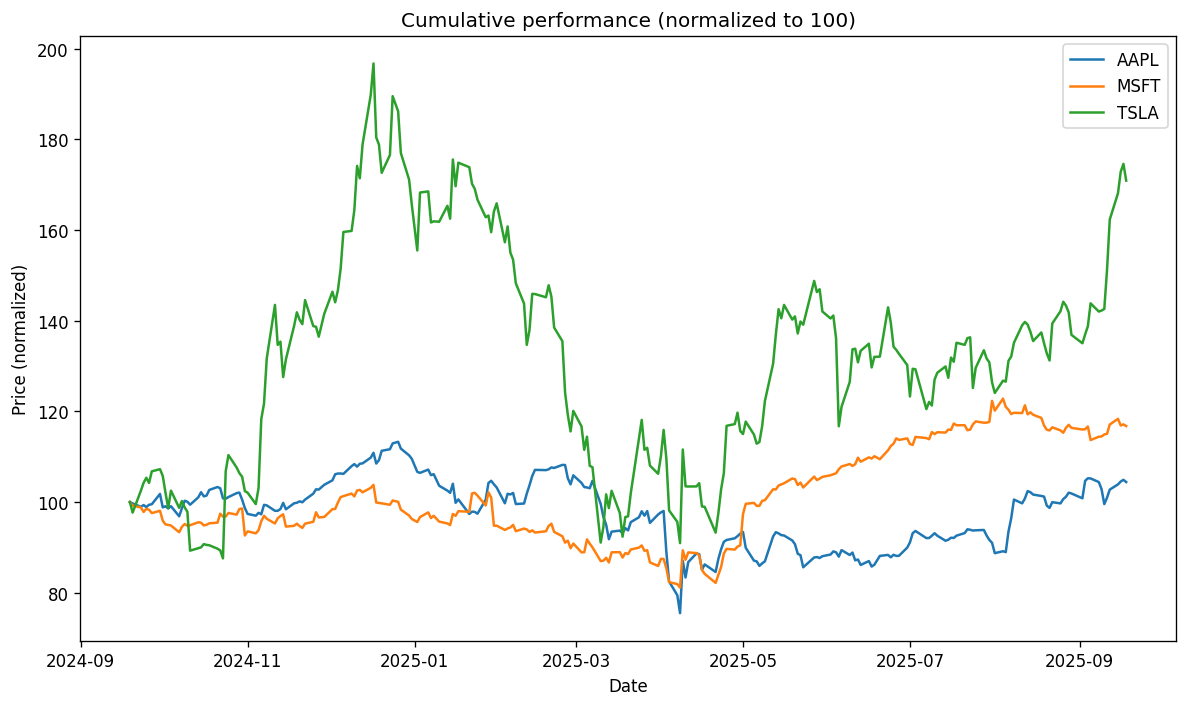

In [8]:
plt.figure()
for ticker in normalized.columns:
    plt.plot(normalized.index, normalized[ticker], label=ticker)

plt.title("Cumulative performance (normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Price (normalized)")
plt.legend()
plt.tight_layout()
plt.show

### Graph above shows the cumulative performance of AAPL, MSFT and TSLA over the past year, normalized to 100 so their growth can be directly compared

In [9]:
returns = prices.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-20,-0.002927,-0.007796,-0.023245
2024-09-23,-0.007581,-0.004043,0.049318
2024-09-24,0.003974,-0.010011,0.017080
2024-09-25,-0.004398,0.006850,0.010815
2024-09-26,0.005080,-0.001851,-0.010894


In [10]:
corr = returns.corr()
print(corr) 

Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.533227  0.485103
MSFT    0.533227  1.000000  0.433382
TSLA    0.485103  0.433382  1.000000


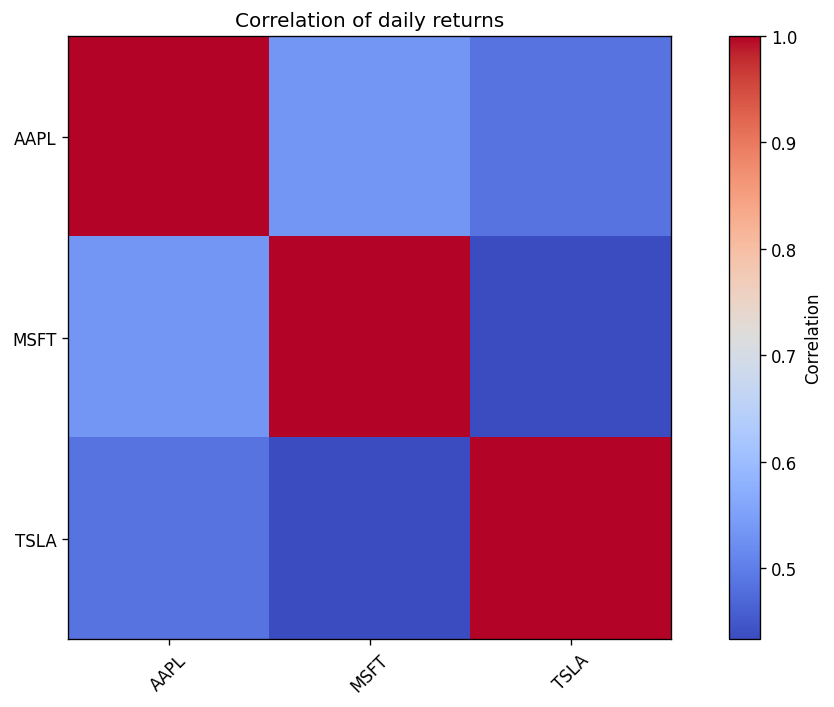

In [11]:
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
plt.title("Correlation of daily returns")
plt.tight_layout()
plt.show()

#### The heatmap above shows the correlation of daily returns between APPL, MSFT and TSLA, where red indicates a strong positive correlation and blue indicates a negative correlation.

In [12]:
import numpy as np
weights = np.array([0.5, 0.3, 0.2])

In [13]:
portfolio_returns = (returns * weights).sum(axis=1)
portfolio_returns.head()

Date
2024-09-20   -0.008452
2024-09-23    0.004860
2024-09-24    0.002400
2024-09-25    0.002019
2024-09-26   -0.000194
dtype: float64

In [14]:
portfolio_cum = (1 + portfolio_returns).cumprod()

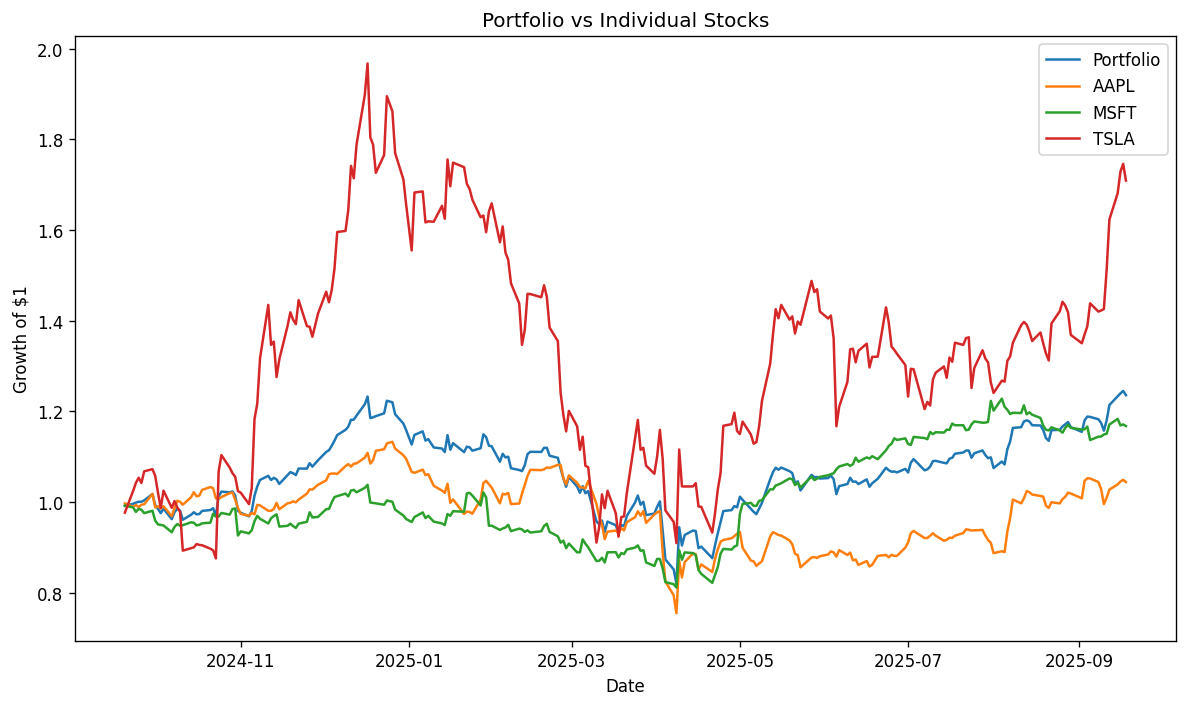

In [15]:
plt.figure()
plt.plot(portfolio_cum, label="Portfolio")
for ticker in returns.columns:
    plt.plot((1 + returns[ticker]).cumprod(), label=ticker)

plt.title("Portfolio vs Individual Stocks")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.tight_layout()
plt.show()

### The graph above shows how a $1 investment would have grown over time in the portoflio versus each individual stock.